In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline

In [3]:
from sklearn.datasets import  load_boston
boston = load_boston()
type(boston)

sklearn.utils.Bunch

In [4]:
boston.data.shape

(506, 13)

In [5]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [7]:
df  = pd.DataFrame(boston.data)
df.columns = boston.feature_names
df['PRICE'] = boston.target
df.head()
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
X = df.drop('PRICE', axis = 1)
Y = df.PRICE

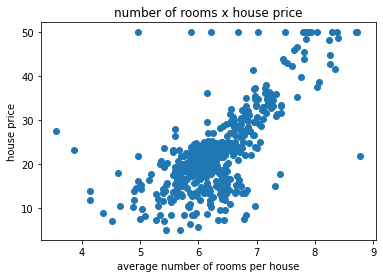

In [10]:
plt.scatter(df.RM, Y)
plt.xlabel('average number of rooms per house')
plt.ylabel('house price')
plt.title('number of rooms x house price')
plt.show()

In [11]:
regression = LinearRegression()
regression.fit(X, Y)
print('coefficient: ', regression.intercept_)
print('number of coefficients: ', len(regression.coef_))

coefficient:  36.45948838508978
number of coefficients:  13


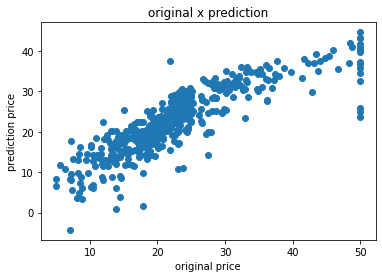

In [12]:
plt.scatter(df.PRICE, regression.predict(X))
plt.xlabel('original price')
plt.ylabel('prediction price')
plt.title('original x prediction')
plt.show()

In [13]:
mse1 = np.mean((df.PRICE - regression.predict(X)) ** 2)
print('mean square error: ', mse1)

mean square error:  21.89483118172921


In [14]:
regression = LinearRegression()
regression.fit(X[['PTRATIO']], df.PRICE)
mse2 = np.mean((df.PRICE - regression.predict(X[['PTRATIO']])) ** 2)
print('mean square error for one variable:', mse2)

mean square error for one variable: 62.65220001376923


In [16]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, df.PRICE, 
                              test_size = 0.30, random_state = 5)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(354, 13) (152, 13) (354,) (152,)


In [20]:
regression = LinearRegression()
regression.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
pred_train = regression.predict(X_train)
pred_test = regression.predict(X_test)

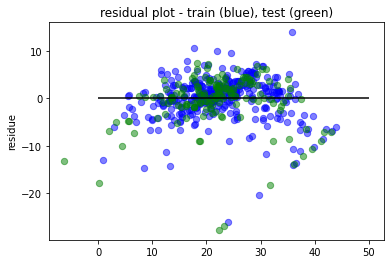

In [25]:
plt.scatter(pred_train, pred_train - Y_train, c = 'b', s = 40, alpha = 0.5)
plt.scatter(pred_test, pred_test - Y_test, c = 'g', s = 40, alpha = 0.5)
plt.hlines(y = 0, xmin = 0, xmax = 50)
plt.ylabel('residue')
plt.title('residual plot - train (blue), test (green)')
plt.show()